In [1]:
import torch
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn
from torchvision import datasets 
from torchvision import transforms
from torchvision.utils import save_image

In [2]:
def to_cuda(x):
    if torch.cuda.is_available():
        x = x.cuda()
    return x

def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

In [3]:
# Image processing 
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=(0.5, ), 
                                     std=(0.5, ))])
# MNIST dataset
mnist = datasets.MNIST(root='./data/',
                       train=True,
                       transform=transform,
                       download=True)
# Data loader
data_loader = torch.utils.data.DataLoader(dataset=mnist, batch_size=100,  shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [12]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(64, 256, kernel_size=4, stride=1, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU())
            
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        
        self.layer3 = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        
        self.layer4 = nn.Sequential(
            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),
            nn.Tanh())
        
        self.fc = nn.Linear(32*32, 784)
    def forward(self, x):
        x = x.view(x.size(0), 64, 1, 1)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = x.view(x.size(0),-1)
        x = self.fc(x)
        return x


In [13]:
# Discriminator
D = nn.Sequential(
    nn.Linear(784, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 1),
    nn.Sigmoid())


# Generator 
G = nn.Sequential(
    nn.Linear(64, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 784),
    nn.Tanh())

G = Generator()

if torch.cuda.is_available():
    D.cuda()
    G.cuda()

# Binary cross entropy loss and optimizer
criterion = nn.BCELoss()

d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0003)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0003)

Epoch [0/200], Step[300/600], d_loss: 1.8139, g_loss: 2.7530, D(x): 0.18, D(G(z)): 0.09
Epoch [0/200], Step[600/600], d_loss: 0.4987, g_loss: 2.4235, D(x): 0.76, D(G(z)): 0.19


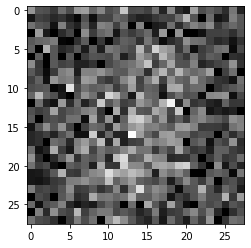

Epoch [1/200], Step[300/600], d_loss: 1.7880, g_loss: 2.9658, D(x): 0.30, D(G(z)): 0.31
Epoch [1/200], Step[600/600], d_loss: 1.1183, g_loss: 2.8582, D(x): 0.66, D(G(z)): 0.44


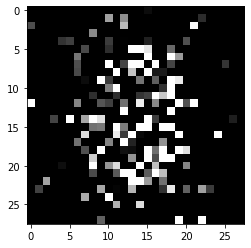

Epoch [2/200], Step[300/600], d_loss: 0.8979, g_loss: 2.7868, D(x): 0.72, D(G(z)): 0.37
Epoch [2/200], Step[600/600], d_loss: 0.7458, g_loss: 3.5082, D(x): 0.76, D(G(z)): 0.35


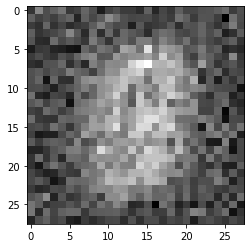

Epoch [3/200], Step[300/600], d_loss: 1.2428, g_loss: 1.7002, D(x): 0.58, D(G(z)): 0.46
Epoch [3/200], Step[600/600], d_loss: 1.4412, g_loss: 1.5114, D(x): 0.44, D(G(z)): 0.44


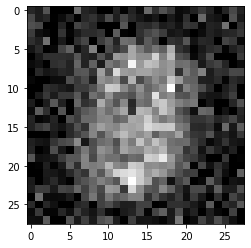

Epoch [4/200], Step[300/600], d_loss: 0.6621, g_loss: 1.8859, D(x): 0.86, D(G(z)): 0.36
Epoch [4/200], Step[600/600], d_loss: 1.1860, g_loss: 1.4739, D(x): 0.76, D(G(z)): 0.55


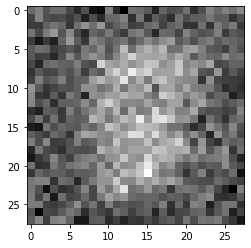

Epoch [5/200], Step[300/600], d_loss: 1.2352, g_loss: 1.0441, D(x): 0.60, D(G(z)): 0.49
Epoch [5/200], Step[600/600], d_loss: 1.6033, g_loss: 1.0757, D(x): 0.46, D(G(z)): 0.52


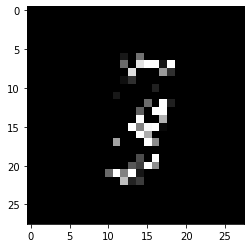

Epoch [6/200], Step[300/600], d_loss: 0.6782, g_loss: 1.6798, D(x): 0.77, D(G(z)): 0.26
Epoch [6/200], Step[600/600], d_loss: 1.0152, g_loss: 1.9637, D(x): 0.74, D(G(z)): 0.34


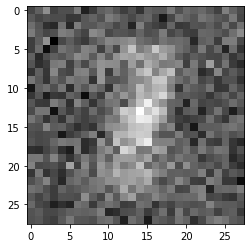

Epoch [7/200], Step[300/600], d_loss: 0.3779, g_loss: 2.5289, D(x): 0.83, D(G(z)): 0.13
Epoch [7/200], Step[600/600], d_loss: 0.6298, g_loss: 3.3260, D(x): 0.75, D(G(z)): 0.19


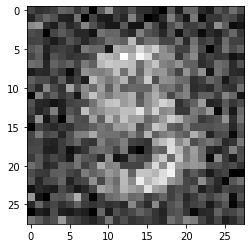

Epoch [8/200], Step[300/600], d_loss: 1.5215, g_loss: 2.2630, D(x): 0.55, D(G(z)): 0.18
Epoch [8/200], Step[600/600], d_loss: 0.1836, g_loss: 3.6062, D(x): 0.91, D(G(z)): 0.06


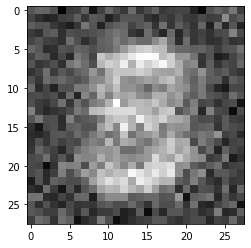

Epoch [9/200], Step[300/600], d_loss: 0.2319, g_loss: 4.1092, D(x): 0.93, D(G(z)): 0.08
Epoch [9/200], Step[600/600], d_loss: 0.3778, g_loss: 2.0126, D(x): 0.88, D(G(z)): 0.14


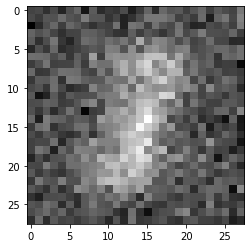

Epoch [10/200], Step[300/600], d_loss: 0.2872, g_loss: 4.1915, D(x): 0.89, D(G(z)): 0.12
Epoch [10/200], Step[600/600], d_loss: 0.4132, g_loss: 4.8393, D(x): 0.87, D(G(z)): 0.10


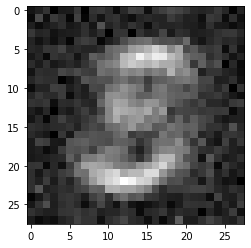

Epoch [11/200], Step[300/600], d_loss: 0.6492, g_loss: 4.1651, D(x): 0.82, D(G(z)): 0.13
Epoch [11/200], Step[600/600], d_loss: 0.3014, g_loss: 6.9223, D(x): 0.97, D(G(z)): 0.19


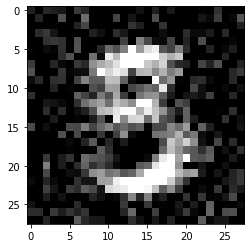

Epoch [12/200], Step[300/600], d_loss: 0.2103, g_loss: 3.7403, D(x): 0.96, D(G(z)): 0.08
Epoch [12/200], Step[600/600], d_loss: 0.3308, g_loss: 3.6081, D(x): 0.89, D(G(z)): 0.09


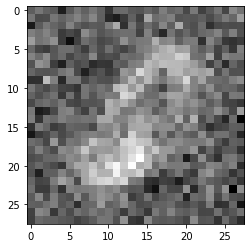

Epoch [13/200], Step[300/600], d_loss: 0.8608, g_loss: 1.9331, D(x): 0.78, D(G(z)): 0.27
Epoch [13/200], Step[600/600], d_loss: 0.6884, g_loss: 3.6892, D(x): 0.69, D(G(z)): 0.08


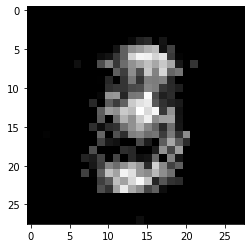

Epoch [14/200], Step[300/600], d_loss: 0.6691, g_loss: 3.1692, D(x): 0.71, D(G(z)): 0.04
Epoch [14/200], Step[600/600], d_loss: 0.3294, g_loss: 2.9963, D(x): 0.85, D(G(z)): 0.09


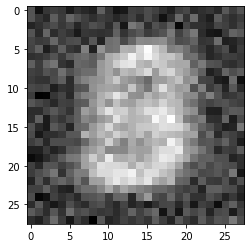

Epoch [15/200], Step[300/600], d_loss: 0.3966, g_loss: 2.9296, D(x): 0.86, D(G(z)): 0.12
Epoch [15/200], Step[600/600], d_loss: 0.3962, g_loss: 4.4217, D(x): 0.88, D(G(z)): 0.10


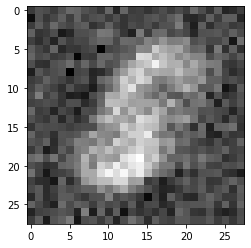

Epoch [16/200], Step[300/600], d_loss: 0.1139, g_loss: 3.3734, D(x): 0.97, D(G(z)): 0.06
Epoch [16/200], Step[600/600], d_loss: 0.4603, g_loss: 3.1146, D(x): 0.84, D(G(z)): 0.09


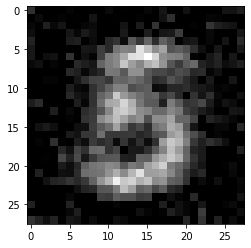

Epoch [17/200], Step[300/600], d_loss: 0.5677, g_loss: 3.9958, D(x): 0.88, D(G(z)): 0.20
Epoch [17/200], Step[600/600], d_loss: 0.3789, g_loss: 2.9182, D(x): 0.90, D(G(z)): 0.11


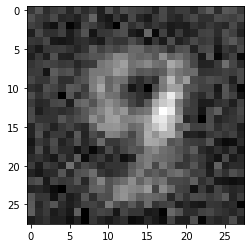

Epoch [18/200], Step[300/600], d_loss: 0.3247, g_loss: 4.3663, D(x): 0.87, D(G(z)): 0.06
Epoch [18/200], Step[600/600], d_loss: 0.1943, g_loss: 4.1035, D(x): 0.92, D(G(z)): 0.04


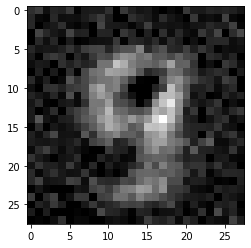

Epoch [19/200], Step[300/600], d_loss: 0.6746, g_loss: 3.5132, D(x): 0.81, D(G(z)): 0.24
Epoch [19/200], Step[600/600], d_loss: 0.3098, g_loss: 3.9017, D(x): 0.93, D(G(z)): 0.17


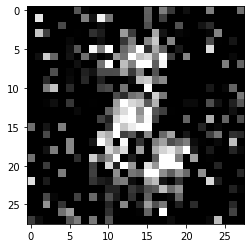

Epoch [20/200], Step[300/600], d_loss: 0.1183, g_loss: 5.0468, D(x): 0.94, D(G(z)): 0.03
Epoch [20/200], Step[600/600], d_loss: 1.2493, g_loss: 5.5677, D(x): 0.71, D(G(z)): 0.33


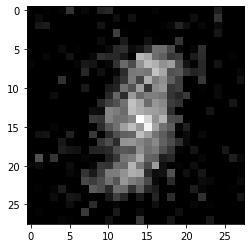

Epoch [21/200], Step[300/600], d_loss: 0.7564, g_loss: 1.8367, D(x): 0.79, D(G(z)): 0.29
Epoch [21/200], Step[600/600], d_loss: 0.8297, g_loss: 3.0407, D(x): 0.81, D(G(z)): 0.26


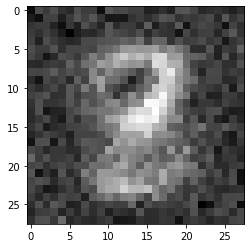

Epoch [22/200], Step[300/600], d_loss: 0.4915, g_loss: 3.6584, D(x): 0.80, D(G(z)): 0.11
Epoch [22/200], Step[600/600], d_loss: 0.3090, g_loss: 3.9768, D(x): 0.91, D(G(z)): 0.13


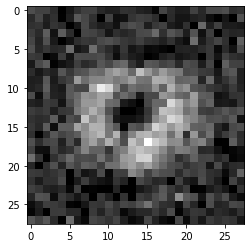

Epoch [23/200], Step[300/600], d_loss: 0.5918, g_loss: 5.4514, D(x): 0.71, D(G(z)): 0.05
Epoch [23/200], Step[600/600], d_loss: 0.3177, g_loss: 5.3306, D(x): 0.86, D(G(z)): 0.08


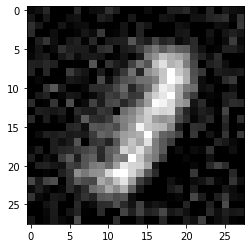

Epoch [24/200], Step[300/600], d_loss: 0.3228, g_loss: 7.1568, D(x): 0.83, D(G(z)): 0.05
Epoch [24/200], Step[600/600], d_loss: 0.6460, g_loss: 5.0768, D(x): 0.82, D(G(z)): 0.08


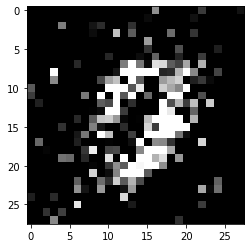

Epoch [25/200], Step[300/600], d_loss: 0.2985, g_loss: 5.2762, D(x): 0.88, D(G(z)): 0.10
Epoch [25/200], Step[600/600], d_loss: 0.5998, g_loss: 4.0521, D(x): 0.77, D(G(z)): 0.08


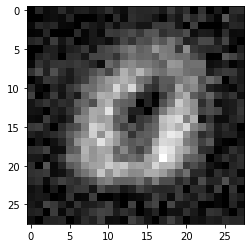

Epoch [26/200], Step[300/600], d_loss: 0.2409, g_loss: 4.7336, D(x): 0.92, D(G(z)): 0.08
Epoch [26/200], Step[600/600], d_loss: 0.6451, g_loss: 2.8401, D(x): 0.82, D(G(z)): 0.21


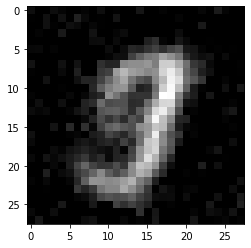

Epoch [27/200], Step[300/600], d_loss: 0.2919, g_loss: 4.7127, D(x): 0.88, D(G(z)): 0.06
Epoch [27/200], Step[600/600], d_loss: 0.3299, g_loss: 2.9451, D(x): 0.91, D(G(z)): 0.16


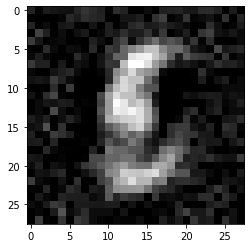

Epoch [28/200], Step[300/600], d_loss: 1.2598, g_loss: 4.5644, D(x): 0.72, D(G(z)): 0.29
Epoch [28/200], Step[600/600], d_loss: 0.5992, g_loss: 2.3665, D(x): 0.86, D(G(z)): 0.22


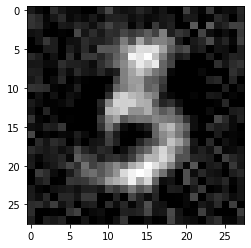

Epoch [29/200], Step[300/600], d_loss: 0.4703, g_loss: 2.6357, D(x): 0.85, D(G(z)): 0.15
Epoch [29/200], Step[600/600], d_loss: 0.3693, g_loss: 4.3295, D(x): 0.85, D(G(z)): 0.10


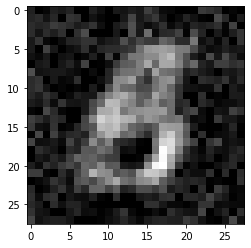

Epoch [30/200], Step[300/600], d_loss: 0.7999, g_loss: 2.7358, D(x): 0.76, D(G(z)): 0.17
Epoch [30/200], Step[600/600], d_loss: 1.0358, g_loss: 3.8432, D(x): 0.64, D(G(z)): 0.17


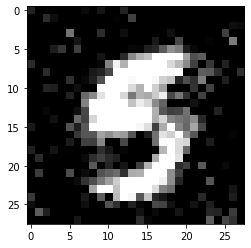

Epoch [31/200], Step[300/600], d_loss: 0.5584, g_loss: 4.0883, D(x): 0.84, D(G(z)): 0.13
Epoch [31/200], Step[600/600], d_loss: 0.6459, g_loss: 4.8674, D(x): 0.85, D(G(z)): 0.16


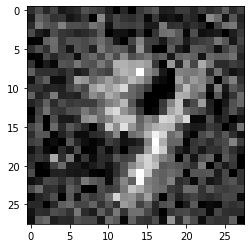

Epoch [32/200], Step[300/600], d_loss: 0.3583, g_loss: 3.6698, D(x): 0.87, D(G(z)): 0.12
Epoch [32/200], Step[600/600], d_loss: 0.5393, g_loss: 2.4627, D(x): 0.78, D(G(z)): 0.10


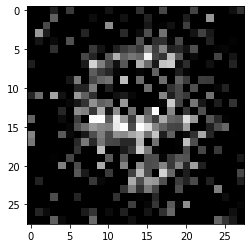

Epoch [33/200], Step[300/600], d_loss: 0.5772, g_loss: 2.4848, D(x): 0.76, D(G(z)): 0.14
Epoch [33/200], Step[600/600], d_loss: 0.6002, g_loss: 3.5712, D(x): 0.88, D(G(z)): 0.24


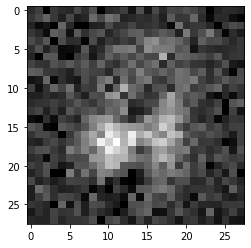

Epoch [34/200], Step[300/600], d_loss: 0.4155, g_loss: 3.8075, D(x): 0.85, D(G(z)): 0.16
Epoch [34/200], Step[600/600], d_loss: 0.6176, g_loss: 2.4328, D(x): 0.86, D(G(z)): 0.28


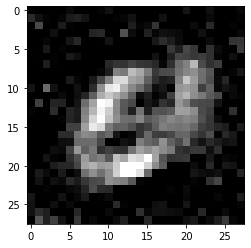

Epoch [35/200], Step[300/600], d_loss: 0.9766, g_loss: 3.2527, D(x): 0.75, D(G(z)): 0.20
Epoch [35/200], Step[600/600], d_loss: 0.5084, g_loss: 2.6916, D(x): 0.82, D(G(z)): 0.16


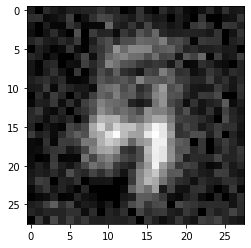

Epoch [36/200], Step[300/600], d_loss: 0.5364, g_loss: 2.5277, D(x): 0.82, D(G(z)): 0.17
Epoch [36/200], Step[600/600], d_loss: 0.4571, g_loss: 4.5403, D(x): 0.85, D(G(z)): 0.13


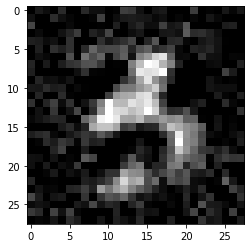

Epoch [37/200], Step[300/600], d_loss: 0.4394, g_loss: 2.3621, D(x): 0.88, D(G(z)): 0.19
Epoch [37/200], Step[600/600], d_loss: 0.4899, g_loss: 4.4635, D(x): 0.81, D(G(z)): 0.08


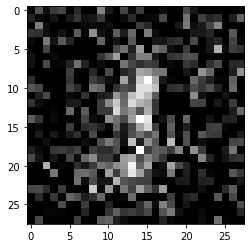

Epoch [38/200], Step[300/600], d_loss: 0.8723, g_loss: 2.6475, D(x): 0.75, D(G(z)): 0.25
Epoch [38/200], Step[600/600], d_loss: 0.4996, g_loss: 2.2532, D(x): 0.83, D(G(z)): 0.19


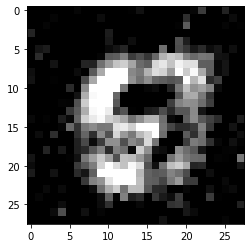

Epoch [39/200], Step[300/600], d_loss: 0.4445, g_loss: 3.6205, D(x): 0.89, D(G(z)): 0.17
Epoch [39/200], Step[600/600], d_loss: 1.0628, g_loss: 2.8830, D(x): 0.75, D(G(z)): 0.24


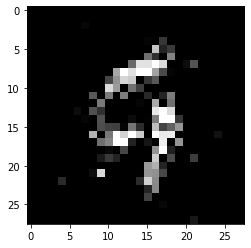

Epoch [40/200], Step[300/600], d_loss: 0.4031, g_loss: 3.3758, D(x): 0.83, D(G(z)): 0.11
Epoch [40/200], Step[600/600], d_loss: 0.4931, g_loss: 2.6803, D(x): 0.86, D(G(z)): 0.21


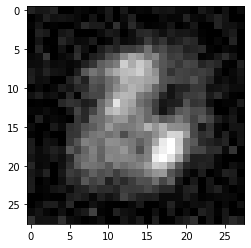

Epoch [41/200], Step[300/600], d_loss: 0.9870, g_loss: 1.8906, D(x): 0.61, D(G(z)): 0.15
Epoch [41/200], Step[600/600], d_loss: 1.0760, g_loss: 2.1555, D(x): 0.68, D(G(z)): 0.23


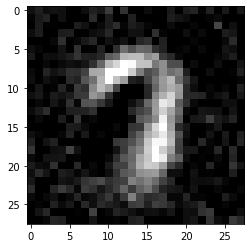

Epoch [42/200], Step[300/600], d_loss: 0.4720, g_loss: 2.7869, D(x): 0.78, D(G(z)): 0.10
Epoch [42/200], Step[600/600], d_loss: 0.5767, g_loss: 2.5208, D(x): 0.85, D(G(z)): 0.23


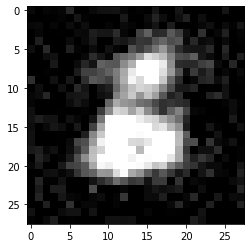

Epoch [43/200], Step[300/600], d_loss: 0.4091, g_loss: 3.8412, D(x): 0.84, D(G(z)): 0.10
Epoch [43/200], Step[600/600], d_loss: 0.6693, g_loss: 2.4861, D(x): 0.80, D(G(z)): 0.21


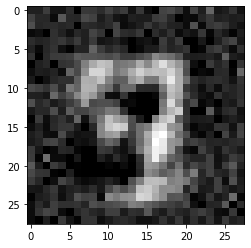

Epoch [44/200], Step[300/600], d_loss: 0.4947, g_loss: 2.9307, D(x): 0.82, D(G(z)): 0.13
Epoch [44/200], Step[600/600], d_loss: 0.5154, g_loss: 3.3545, D(x): 0.85, D(G(z)): 0.18


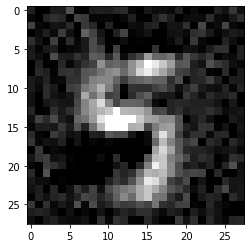

Epoch [45/200], Step[300/600], d_loss: 0.3026, g_loss: 3.5019, D(x): 0.90, D(G(z)): 0.11
Epoch [45/200], Step[600/600], d_loss: 0.7068, g_loss: 5.2500, D(x): 0.81, D(G(z)): 0.16


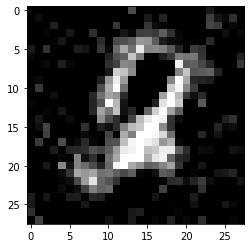

Epoch [46/200], Step[300/600], d_loss: 0.3560, g_loss: 3.2171, D(x): 0.85, D(G(z)): 0.12
Epoch [46/200], Step[600/600], d_loss: 0.2354, g_loss: 3.6159, D(x): 0.93, D(G(z)): 0.12


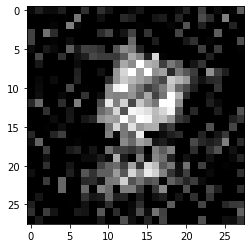

Epoch [47/200], Step[300/600], d_loss: 0.5812, g_loss: 3.2780, D(x): 0.76, D(G(z)): 0.15
Epoch [47/200], Step[600/600], d_loss: 0.7377, g_loss: 2.2821, D(x): 0.80, D(G(z)): 0.23


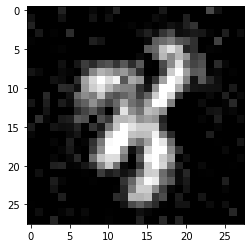

Epoch [48/200], Step[300/600], d_loss: 0.5709, g_loss: 3.1467, D(x): 0.91, D(G(z)): 0.26
Epoch [48/200], Step[600/600], d_loss: 1.1230, g_loss: 2.0914, D(x): 0.70, D(G(z)): 0.30


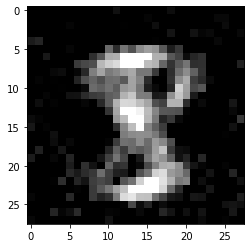

Epoch [49/200], Step[300/600], d_loss: 0.5367, g_loss: 3.8064, D(x): 0.91, D(G(z)): 0.23
Epoch [49/200], Step[600/600], d_loss: 0.9741, g_loss: 2.7769, D(x): 0.62, D(G(z)): 0.12


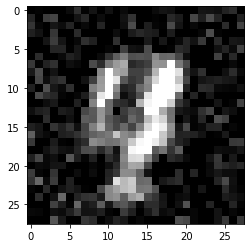

Epoch [50/200], Step[300/600], d_loss: 0.4891, g_loss: 2.5750, D(x): 0.84, D(G(z)): 0.18
Epoch [50/200], Step[600/600], d_loss: 0.4522, g_loss: 2.6614, D(x): 0.84, D(G(z)): 0.14


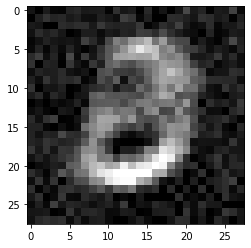

Epoch [51/200], Step[300/600], d_loss: 0.4142, g_loss: 3.1570, D(x): 0.83, D(G(z)): 0.10
Epoch [51/200], Step[600/600], d_loss: 1.0874, g_loss: 2.6668, D(x): 0.65, D(G(z)): 0.24


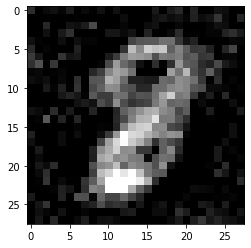

Epoch [52/200], Step[300/600], d_loss: 1.0667, g_loss: 2.3276, D(x): 0.67, D(G(z)): 0.23
Epoch [52/200], Step[600/600], d_loss: 0.6645, g_loss: 5.0727, D(x): 0.72, D(G(z)): 0.12


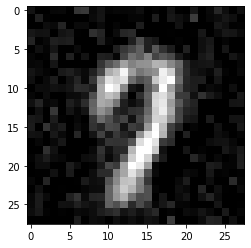

Epoch [53/200], Step[300/600], d_loss: 0.4534, g_loss: 3.4743, D(x): 0.86, D(G(z)): 0.18
Epoch [53/200], Step[600/600], d_loss: 0.3833, g_loss: 3.4257, D(x): 0.88, D(G(z)): 0.18


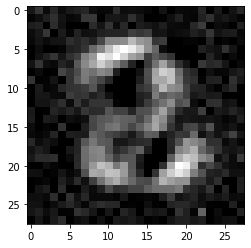

Epoch [54/200], Step[300/600], d_loss: 0.8357, g_loss: 2.4782, D(x): 0.73, D(G(z)): 0.24
Epoch [54/200], Step[600/600], d_loss: 0.6271, g_loss: 2.4812, D(x): 0.78, D(G(z)): 0.22


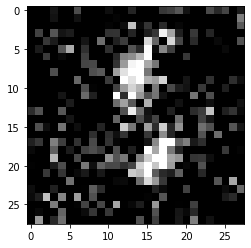

Epoch [55/200], Step[300/600], d_loss: 0.9646, g_loss: 2.3714, D(x): 0.76, D(G(z)): 0.26
Epoch [55/200], Step[600/600], d_loss: 0.6971, g_loss: 2.7995, D(x): 0.74, D(G(z)): 0.18


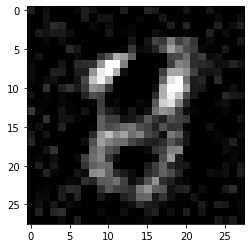

Epoch [56/200], Step[300/600], d_loss: 0.6849, g_loss: 3.4531, D(x): 0.76, D(G(z)): 0.18
Epoch [56/200], Step[600/600], d_loss: 0.8999, g_loss: 2.6769, D(x): 0.73, D(G(z)): 0.26


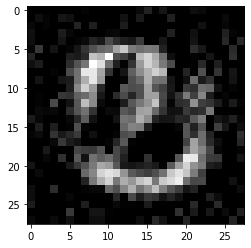

Epoch [57/200], Step[300/600], d_loss: 0.4532, g_loss: 2.4598, D(x): 0.91, D(G(z)): 0.23
Epoch [57/200], Step[600/600], d_loss: 0.6071, g_loss: 3.5057, D(x): 0.78, D(G(z)): 0.15


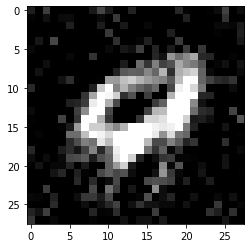

Epoch [58/200], Step[300/600], d_loss: 0.9735, g_loss: 1.3836, D(x): 0.72, D(G(z)): 0.37
Epoch [58/200], Step[600/600], d_loss: 1.0338, g_loss: 1.6669, D(x): 0.69, D(G(z)): 0.24


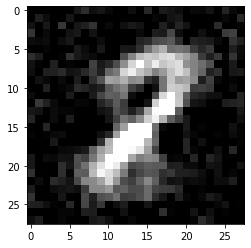

Epoch [59/200], Step[300/600], d_loss: 0.7749, g_loss: 3.2524, D(x): 0.78, D(G(z)): 0.23
Epoch [59/200], Step[600/600], d_loss: 0.4178, g_loss: 4.3234, D(x): 0.81, D(G(z)): 0.11


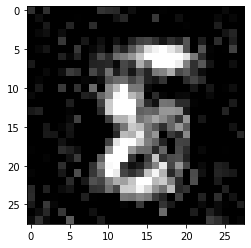

Epoch [60/200], Step[300/600], d_loss: 0.5151, g_loss: 2.7662, D(x): 0.82, D(G(z)): 0.17
Epoch [60/200], Step[600/600], d_loss: 1.3223, g_loss: 2.2920, D(x): 0.64, D(G(z)): 0.30


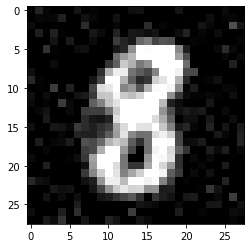

Epoch [61/200], Step[300/600], d_loss: 0.6895, g_loss: 2.4324, D(x): 0.80, D(G(z)): 0.25
Epoch [61/200], Step[600/600], d_loss: 0.3647, g_loss: 3.7301, D(x): 0.93, D(G(z)): 0.10


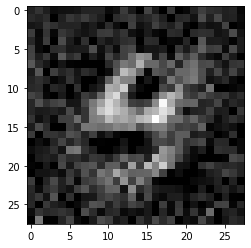

Epoch [62/200], Step[300/600], d_loss: 0.4603, g_loss: 2.8281, D(x): 0.81, D(G(z)): 0.12
Epoch [62/200], Step[600/600], d_loss: 0.5030, g_loss: 2.4873, D(x): 0.83, D(G(z)): 0.20


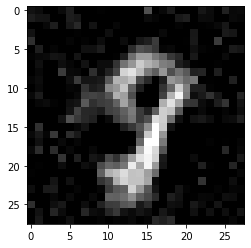

Epoch [63/200], Step[300/600], d_loss: 0.4150, g_loss: 2.5083, D(x): 0.90, D(G(z)): 0.19
Epoch [63/200], Step[600/600], d_loss: 0.5613, g_loss: 3.5066, D(x): 0.79, D(G(z)): 0.12


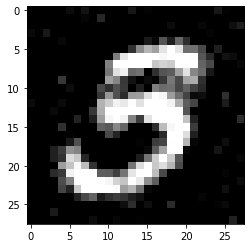

Epoch [64/200], Step[300/600], d_loss: 0.7877, g_loss: 2.1715, D(x): 0.82, D(G(z)): 0.31
Epoch [64/200], Step[600/600], d_loss: 0.9507, g_loss: 1.6191, D(x): 0.75, D(G(z)): 0.33


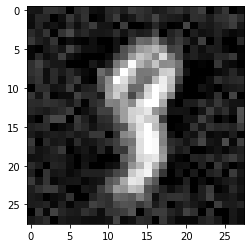

Epoch [65/200], Step[300/600], d_loss: 0.7279, g_loss: 2.1424, D(x): 0.84, D(G(z)): 0.30
Epoch [65/200], Step[600/600], d_loss: 0.7894, g_loss: 3.0246, D(x): 0.70, D(G(z)): 0.13


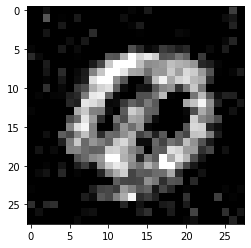

Epoch [66/200], Step[300/600], d_loss: 0.8788, g_loss: 1.8312, D(x): 0.77, D(G(z)): 0.33
Epoch [66/200], Step[600/600], d_loss: 0.5402, g_loss: 1.9205, D(x): 0.86, D(G(z)): 0.24


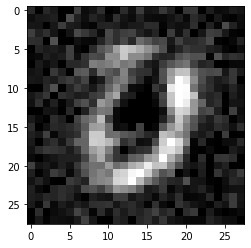

Epoch [67/200], Step[300/600], d_loss: 0.6281, g_loss: 3.5099, D(x): 0.76, D(G(z)): 0.18
Epoch [67/200], Step[600/600], d_loss: 0.7517, g_loss: 4.1948, D(x): 0.77, D(G(z)): 0.21


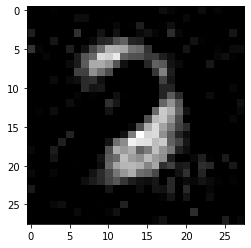

Epoch [68/200], Step[300/600], d_loss: 0.5776, g_loss: 2.4025, D(x): 0.80, D(G(z)): 0.20
Epoch [68/200], Step[600/600], d_loss: 0.6974, g_loss: 2.0114, D(x): 0.79, D(G(z)): 0.22


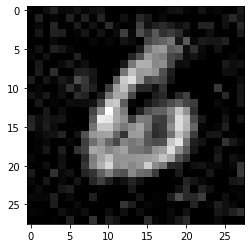

Epoch [69/200], Step[300/600], d_loss: 0.8838, g_loss: 1.8800, D(x): 0.80, D(G(z)): 0.35
Epoch [69/200], Step[600/600], d_loss: 0.9182, g_loss: 3.8709, D(x): 0.73, D(G(z)): 0.25


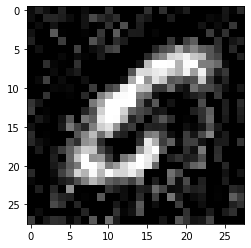

Epoch [70/200], Step[300/600], d_loss: 0.7447, g_loss: 3.4034, D(x): 0.77, D(G(z)): 0.25
Epoch [70/200], Step[600/600], d_loss: 0.9332, g_loss: 2.2778, D(x): 0.73, D(G(z)): 0.32


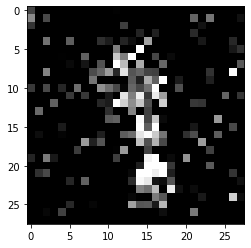

Epoch [71/200], Step[300/600], d_loss: 0.5351, g_loss: 2.1062, D(x): 0.88, D(G(z)): 0.24
Epoch [71/200], Step[600/600], d_loss: 0.7610, g_loss: 2.2401, D(x): 0.85, D(G(z)): 0.30


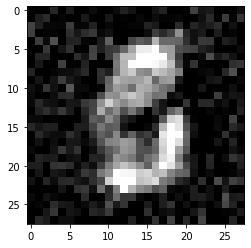

Epoch [72/200], Step[300/600], d_loss: 0.4860, g_loss: 3.0514, D(x): 0.79, D(G(z)): 0.13
Epoch [72/200], Step[600/600], d_loss: 0.3812, g_loss: 2.9826, D(x): 0.87, D(G(z)): 0.16


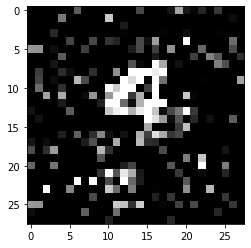

Epoch [73/200], Step[300/600], d_loss: 0.8900, g_loss: 3.6729, D(x): 0.72, D(G(z)): 0.22
Epoch [73/200], Step[600/600], d_loss: 0.9225, g_loss: 2.8922, D(x): 0.70, D(G(z)): 0.25


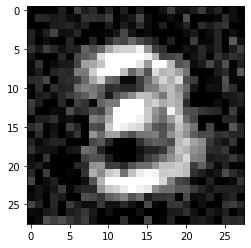

Epoch [74/200], Step[300/600], d_loss: 0.8742, g_loss: 2.0031, D(x): 0.70, D(G(z)): 0.23
Epoch [74/200], Step[600/600], d_loss: 0.8831, g_loss: 3.0660, D(x): 0.76, D(G(z)): 0.26


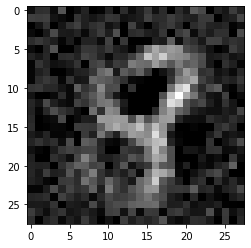

Epoch [75/200], Step[300/600], d_loss: 0.6482, g_loss: 2.8502, D(x): 0.79, D(G(z)): 0.18
Epoch [75/200], Step[600/600], d_loss: 0.7018, g_loss: 2.4774, D(x): 0.82, D(G(z)): 0.26


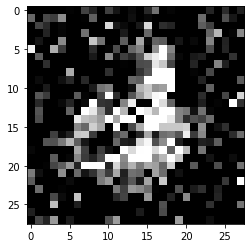

Epoch [76/200], Step[300/600], d_loss: 0.5634, g_loss: 2.5519, D(x): 0.86, D(G(z)): 0.26
Epoch [76/200], Step[600/600], d_loss: 0.6602, g_loss: 2.0547, D(x): 0.80, D(G(z)): 0.23


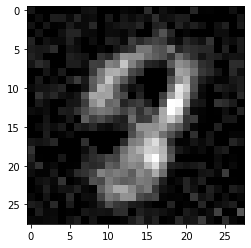

Epoch [77/200], Step[300/600], d_loss: 0.3777, g_loss: 3.0513, D(x): 0.86, D(G(z)): 0.11
Epoch [77/200], Step[600/600], d_loss: 0.7298, g_loss: 2.5903, D(x): 0.83, D(G(z)): 0.28


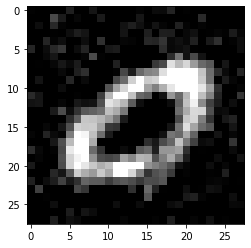

Epoch [78/200], Step[300/600], d_loss: 0.7589, g_loss: 2.0126, D(x): 0.82, D(G(z)): 0.30
Epoch [78/200], Step[600/600], d_loss: 0.5497, g_loss: 2.9361, D(x): 0.82, D(G(z)): 0.18


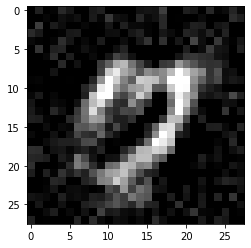

Epoch [79/200], Step[300/600], d_loss: 0.7514, g_loss: 1.9285, D(x): 0.83, D(G(z)): 0.28
Epoch [79/200], Step[600/600], d_loss: 0.8006, g_loss: 3.3801, D(x): 0.67, D(G(z)): 0.12


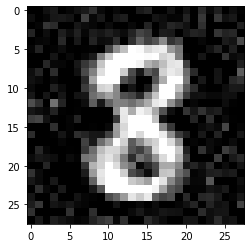

Epoch [80/200], Step[300/600], d_loss: 0.9156, g_loss: 2.6244, D(x): 0.69, D(G(z)): 0.20
Epoch [80/200], Step[600/600], d_loss: 0.7268, g_loss: 3.7694, D(x): 0.78, D(G(z)): 0.16


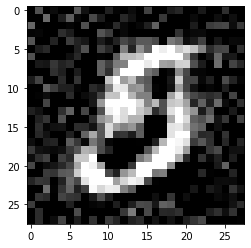

Epoch [81/200], Step[300/600], d_loss: 1.0625, g_loss: 3.1028, D(x): 0.64, D(G(z)): 0.25
Epoch [81/200], Step[600/600], d_loss: 1.2500, g_loss: 5.7801, D(x): 0.60, D(G(z)): 0.27


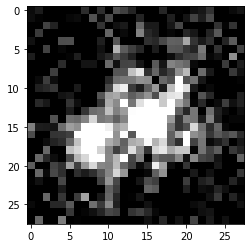

Epoch [82/200], Step[300/600], d_loss: 0.6027, g_loss: 2.8729, D(x): 0.83, D(G(z)): 0.19
Epoch [82/200], Step[600/600], d_loss: 0.9698, g_loss: 2.1533, D(x): 0.71, D(G(z)): 0.30


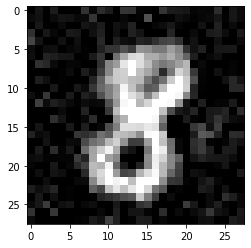

Epoch [83/200], Step[300/600], d_loss: 0.4269, g_loss: 2.6497, D(x): 0.86, D(G(z)): 0.17
Epoch [83/200], Step[600/600], d_loss: 0.9606, g_loss: 2.0618, D(x): 0.60, D(G(z)): 0.15


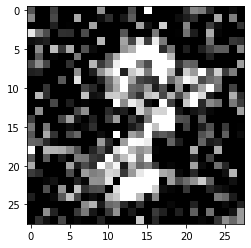

Epoch [84/200], Step[300/600], d_loss: 0.7061, g_loss: 2.2010, D(x): 0.77, D(G(z)): 0.25
Epoch [84/200], Step[600/600], d_loss: 0.6906, g_loss: 3.1970, D(x): 0.75, D(G(z)): 0.16


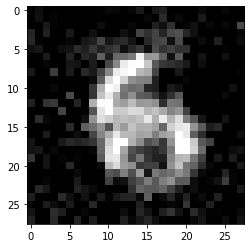

Epoch [85/200], Step[300/600], d_loss: 0.6438, g_loss: 2.7529, D(x): 0.78, D(G(z)): 0.19
Epoch [85/200], Step[600/600], d_loss: 0.3944, g_loss: 3.3330, D(x): 0.83, D(G(z)): 0.11


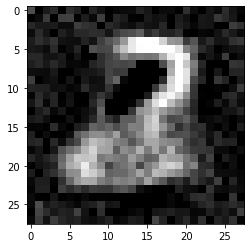

Epoch [86/200], Step[300/600], d_loss: 0.6845, g_loss: 2.6696, D(x): 0.80, D(G(z)): 0.22
Epoch [86/200], Step[600/600], d_loss: 1.0114, g_loss: 2.0703, D(x): 0.68, D(G(z)): 0.27


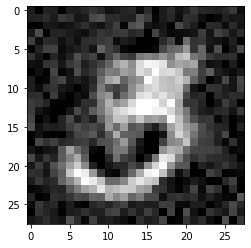

Epoch [87/200], Step[300/600], d_loss: 0.5949, g_loss: 2.2731, D(x): 0.84, D(G(z)): 0.25
Epoch [87/200], Step[600/600], d_loss: 0.6882, g_loss: 2.0029, D(x): 0.79, D(G(z)): 0.23


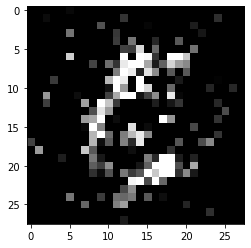

Epoch [88/200], Step[300/600], d_loss: 0.7617, g_loss: 1.9465, D(x): 0.86, D(G(z)): 0.34
Epoch [88/200], Step[600/600], d_loss: 1.0183, g_loss: 2.0028, D(x): 0.68, D(G(z)): 0.26


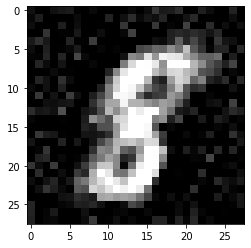

Epoch [89/200], Step[300/600], d_loss: 0.6544, g_loss: 2.1173, D(x): 0.86, D(G(z)): 0.26
Epoch [89/200], Step[600/600], d_loss: 0.5690, g_loss: 2.3935, D(x): 0.78, D(G(z)): 0.17


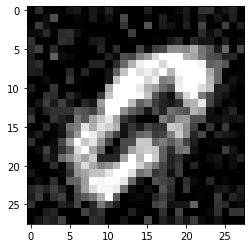

Epoch [90/200], Step[300/600], d_loss: 0.4645, g_loss: 3.0159, D(x): 0.90, D(G(z)): 0.24
Epoch [90/200], Step[600/600], d_loss: 0.6105, g_loss: 2.3620, D(x): 0.77, D(G(z)): 0.16


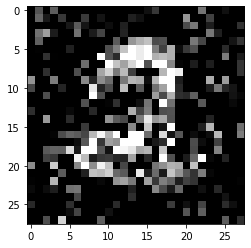

Epoch [91/200], Step[300/600], d_loss: 1.2191, g_loss: 1.4566, D(x): 0.77, D(G(z)): 0.42
Epoch [91/200], Step[600/600], d_loss: 0.5412, g_loss: 3.3310, D(x): 0.81, D(G(z)): 0.13


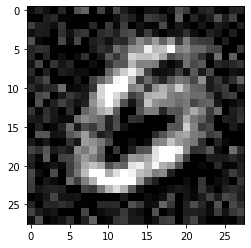

Epoch [92/200], Step[300/600], d_loss: 1.1883, g_loss: 2.0771, D(x): 0.61, D(G(z)): 0.22
Epoch [92/200], Step[600/600], d_loss: 0.4299, g_loss: 2.8630, D(x): 0.89, D(G(z)): 0.20


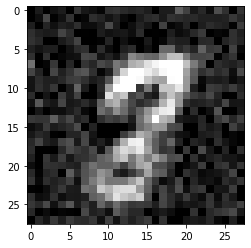

Epoch [93/200], Step[300/600], d_loss: 0.6654, g_loss: 1.8350, D(x): 0.80, D(G(z)): 0.24
Epoch [93/200], Step[600/600], d_loss: 0.5190, g_loss: 3.1759, D(x): 0.80, D(G(z)): 0.15


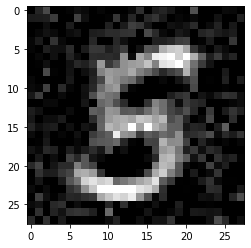

Epoch [94/200], Step[300/600], d_loss: 0.8295, g_loss: 2.2644, D(x): 0.70, D(G(z)): 0.21
Epoch [94/200], Step[600/600], d_loss: 0.9530, g_loss: 2.0120, D(x): 0.78, D(G(z)): 0.33


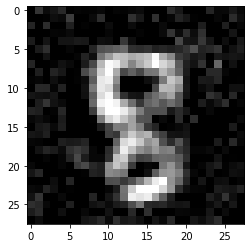

Epoch [95/200], Step[300/600], d_loss: 0.5498, g_loss: 2.5747, D(x): 0.78, D(G(z)): 0.19
Epoch [95/200], Step[600/600], d_loss: 0.8343, g_loss: 2.2635, D(x): 0.66, D(G(z)): 0.16


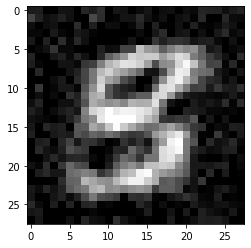

Epoch [96/200], Step[300/600], d_loss: 0.5782, g_loss: 3.2024, D(x): 0.82, D(G(z)): 0.21
Epoch [96/200], Step[600/600], d_loss: 0.7694, g_loss: 1.8205, D(x): 0.74, D(G(z)): 0.24


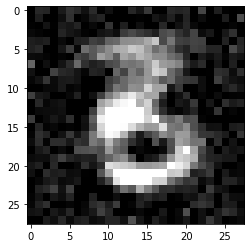

Epoch [97/200], Step[300/600], d_loss: 0.6708, g_loss: 2.5525, D(x): 0.82, D(G(z)): 0.25
Epoch [97/200], Step[600/600], d_loss: 0.9203, g_loss: 2.3602, D(x): 0.73, D(G(z)): 0.24


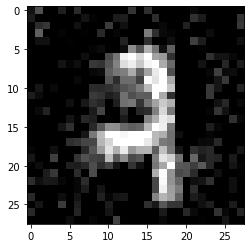

Epoch [98/200], Step[300/600], d_loss: 0.8047, g_loss: 2.4294, D(x): 0.77, D(G(z)): 0.24
Epoch [98/200], Step[600/600], d_loss: 1.0341, g_loss: 1.6011, D(x): 0.79, D(G(z)): 0.39


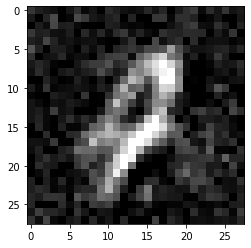

Epoch [99/200], Step[300/600], d_loss: 0.5382, g_loss: 3.2748, D(x): 0.81, D(G(z)): 0.18
Epoch [99/200], Step[600/600], d_loss: 0.5253, g_loss: 2.8050, D(x): 0.82, D(G(z)): 0.18


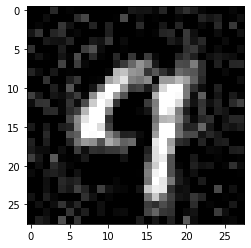

Epoch [100/200], Step[300/600], d_loss: 0.6141, g_loss: 2.5174, D(x): 0.86, D(G(z)): 0.27
Epoch [100/200], Step[600/600], d_loss: 0.6635, g_loss: 3.0049, D(x): 0.72, D(G(z)): 0.16


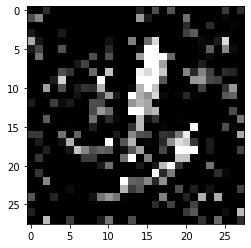

Epoch [101/200], Step[300/600], d_loss: 0.6924, g_loss: 5.3439, D(x): 0.75, D(G(z)): 0.17
Epoch [101/200], Step[600/600], d_loss: 1.2491, g_loss: 1.9362, D(x): 0.78, D(G(z)): 0.44


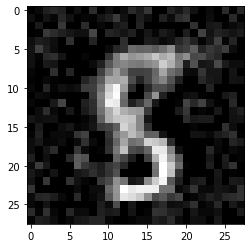

Epoch [102/200], Step[300/600], d_loss: 0.9090, g_loss: 2.9482, D(x): 0.70, D(G(z)): 0.23
Epoch [102/200], Step[600/600], d_loss: 0.4385, g_loss: 4.4715, D(x): 0.85, D(G(z)): 0.12


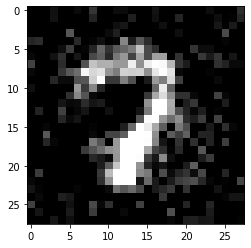

Epoch [103/200], Step[300/600], d_loss: 0.7052, g_loss: 2.1966, D(x): 0.74, D(G(z)): 0.20
Epoch [103/200], Step[600/600], d_loss: 0.8232, g_loss: 2.0391, D(x): 0.73, D(G(z)): 0.25


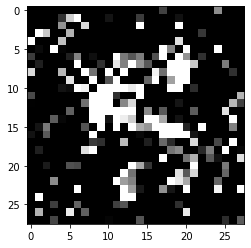

Epoch [104/200], Step[300/600], d_loss: 0.5953, g_loss: 2.8567, D(x): 0.78, D(G(z)): 0.19
Epoch [104/200], Step[600/600], d_loss: 0.9475, g_loss: 2.0257, D(x): 0.78, D(G(z)): 0.34


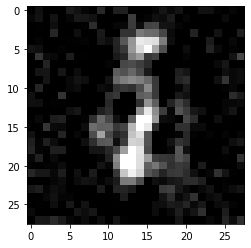

Epoch [105/200], Step[300/600], d_loss: 0.4662, g_loss: 2.9746, D(x): 0.86, D(G(z)): 0.20
Epoch [105/200], Step[600/600], d_loss: 0.4216, g_loss: 4.3815, D(x): 0.83, D(G(z)): 0.11


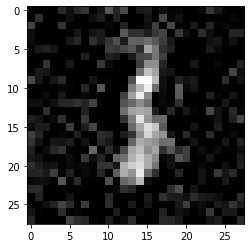

Epoch [106/200], Step[300/600], d_loss: 0.8248, g_loss: 2.6986, D(x): 0.71, D(G(z)): 0.24
Epoch [106/200], Step[600/600], d_loss: 0.7640, g_loss: 2.4979, D(x): 0.70, D(G(z)): 0.19


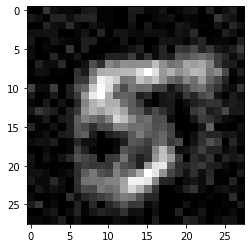

Epoch [107/200], Step[300/600], d_loss: 0.7415, g_loss: 1.7654, D(x): 0.81, D(G(z)): 0.28
Epoch [107/200], Step[600/600], d_loss: 0.6367, g_loss: 1.5480, D(x): 0.85, D(G(z)): 0.29


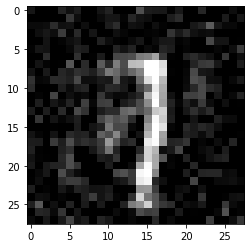

Epoch [108/200], Step[300/600], d_loss: 0.6122, g_loss: 2.8651, D(x): 0.80, D(G(z)): 0.24
Epoch [108/200], Step[600/600], d_loss: 1.0873, g_loss: 2.3433, D(x): 0.65, D(G(z)): 0.28


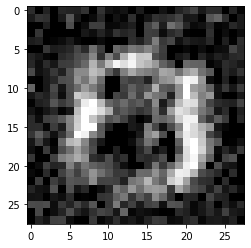

Epoch [109/200], Step[300/600], d_loss: 0.7481, g_loss: 2.6124, D(x): 0.72, D(G(z)): 0.18
Epoch [109/200], Step[600/600], d_loss: 0.5831, g_loss: 2.2986, D(x): 0.81, D(G(z)): 0.22


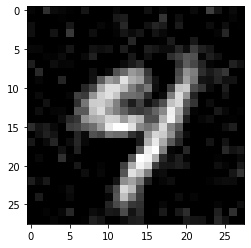

Epoch [110/200], Step[300/600], d_loss: 0.7449, g_loss: 2.3169, D(x): 0.87, D(G(z)): 0.34
Epoch [110/200], Step[600/600], d_loss: 0.8681, g_loss: 2.8156, D(x): 0.73, D(G(z)): 0.17


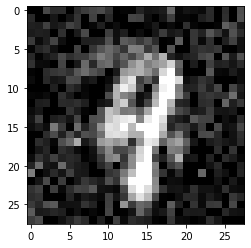

Epoch [111/200], Step[300/600], d_loss: 0.7711, g_loss: 2.8228, D(x): 0.71, D(G(z)): 0.18
Epoch [111/200], Step[600/600], d_loss: 0.9105, g_loss: 1.4024, D(x): 0.70, D(G(z)): 0.28


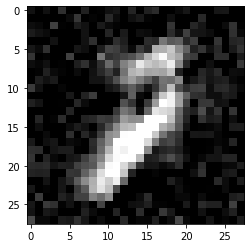

Epoch [112/200], Step[300/600], d_loss: 0.7944, g_loss: 2.5478, D(x): 0.73, D(G(z)): 0.25
Epoch [112/200], Step[600/600], d_loss: 0.6394, g_loss: 2.8445, D(x): 0.75, D(G(z)): 0.17


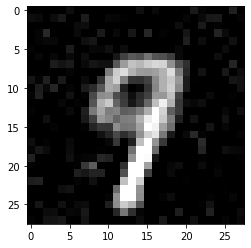

Epoch [113/200], Step[300/600], d_loss: 0.7376, g_loss: 2.3443, D(x): 0.76, D(G(z)): 0.24
Epoch [113/200], Step[600/600], d_loss: 0.7236, g_loss: 2.2499, D(x): 0.75, D(G(z)): 0.21


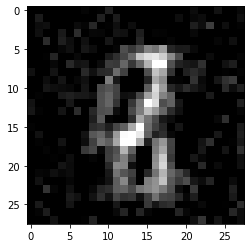

Epoch [114/200], Step[300/600], d_loss: 0.7014, g_loss: 2.5841, D(x): 0.77, D(G(z)): 0.26
Epoch [114/200], Step[600/600], d_loss: 0.7020, g_loss: 2.0342, D(x): 0.77, D(G(z)): 0.25


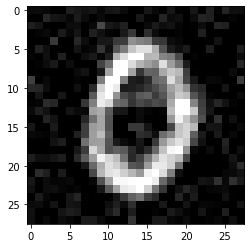

Epoch [115/200], Step[300/600], d_loss: 0.4054, g_loss: 3.1440, D(x): 0.85, D(G(z)): 0.13
Epoch [115/200], Step[600/600], d_loss: 0.4947, g_loss: 2.1746, D(x): 0.83, D(G(z)): 0.19


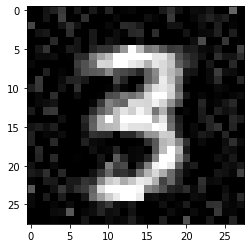

Epoch [116/200], Step[300/600], d_loss: 0.6278, g_loss: 2.9447, D(x): 0.79, D(G(z)): 0.20
Epoch [116/200], Step[600/600], d_loss: 1.0907, g_loss: 1.5734, D(x): 0.80, D(G(z)): 0.39


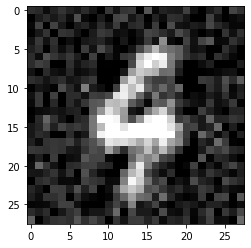

Epoch [117/200], Step[300/600], d_loss: 0.5969, g_loss: 3.1390, D(x): 0.77, D(G(z)): 0.12
Epoch [117/200], Step[600/600], d_loss: 0.2988, g_loss: 3.3687, D(x): 0.88, D(G(z)): 0.12


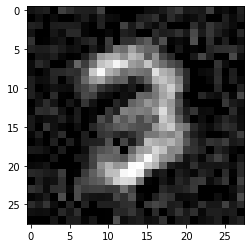

Epoch [118/200], Step[300/600], d_loss: 0.5978, g_loss: 3.3023, D(x): 0.80, D(G(z)): 0.19
Epoch [118/200], Step[600/600], d_loss: 0.9428, g_loss: 1.9594, D(x): 0.76, D(G(z)): 0.33


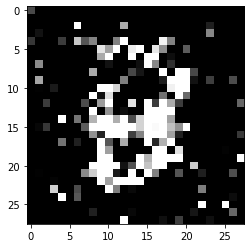

Epoch [119/200], Step[300/600], d_loss: 0.6656, g_loss: 2.2615, D(x): 0.78, D(G(z)): 0.24
Epoch [119/200], Step[600/600], d_loss: 0.7589, g_loss: 1.4748, D(x): 0.76, D(G(z)): 0.24


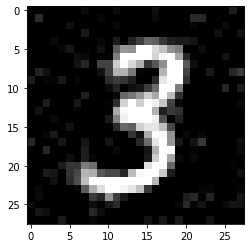

Epoch [120/200], Step[300/600], d_loss: 0.6284, g_loss: 2.7846, D(x): 0.83, D(G(z)): 0.25
Epoch [120/200], Step[600/600], d_loss: 0.6938, g_loss: 2.5599, D(x): 0.75, D(G(z)): 0.18


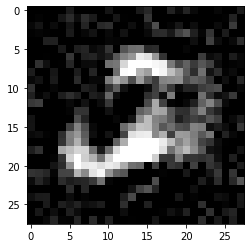

Epoch [121/200], Step[300/600], d_loss: 1.0044, g_loss: 2.6145, D(x): 0.68, D(G(z)): 0.26
Epoch [121/200], Step[600/600], d_loss: 0.7369, g_loss: 2.4765, D(x): 0.73, D(G(z)): 0.20


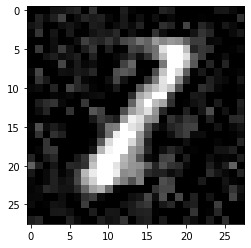

Epoch [122/200], Step[300/600], d_loss: 0.6109, g_loss: 1.9576, D(x): 0.77, D(G(z)): 0.17
Epoch [122/200], Step[600/600], d_loss: 0.7399, g_loss: 2.0605, D(x): 0.76, D(G(z)): 0.25


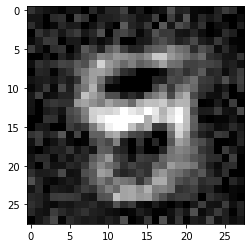

Epoch [123/200], Step[300/600], d_loss: 0.8437, g_loss: 3.0158, D(x): 0.76, D(G(z)): 0.23
Epoch [123/200], Step[600/600], d_loss: 0.9171, g_loss: 2.3747, D(x): 0.67, D(G(z)): 0.24


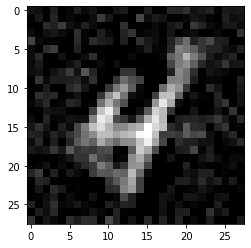

Epoch [124/200], Step[300/600], d_loss: 0.7271, g_loss: 2.4123, D(x): 0.75, D(G(z)): 0.22
Epoch [124/200], Step[600/600], d_loss: 0.4922, g_loss: 2.6195, D(x): 0.83, D(G(z)): 0.19


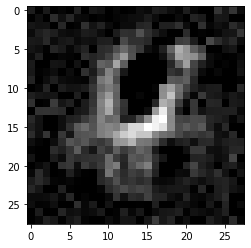

Epoch [125/200], Step[300/600], d_loss: 0.6754, g_loss: 2.3896, D(x): 0.78, D(G(z)): 0.22
Epoch [125/200], Step[600/600], d_loss: 0.5592, g_loss: 2.3857, D(x): 0.83, D(G(z)): 0.22


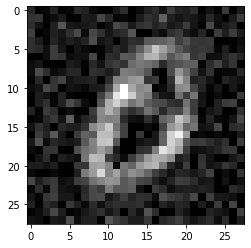

Epoch [126/200], Step[300/600], d_loss: 0.4279, g_loss: 2.5976, D(x): 0.87, D(G(z)): 0.19
Epoch [126/200], Step[600/600], d_loss: 0.7578, g_loss: 2.1992, D(x): 0.75, D(G(z)): 0.22


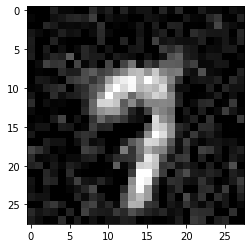

Epoch [127/200], Step[300/600], d_loss: 0.7997, g_loss: 3.0455, D(x): 0.76, D(G(z)): 0.25
Epoch [127/200], Step[600/600], d_loss: 0.7435, g_loss: 2.8227, D(x): 0.74, D(G(z)): 0.18


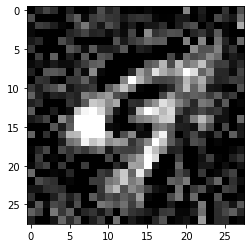

Epoch [128/200], Step[300/600], d_loss: 1.1721, g_loss: 2.2161, D(x): 0.63, D(G(z)): 0.30
Epoch [128/200], Step[600/600], d_loss: 0.6717, g_loss: 2.6826, D(x): 0.76, D(G(z)): 0.18


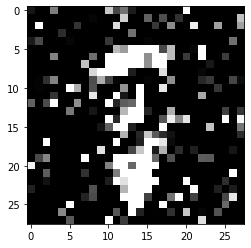

Epoch [129/200], Step[300/600], d_loss: 0.7442, g_loss: 3.1021, D(x): 0.74, D(G(z)): 0.21
Epoch [129/200], Step[600/600], d_loss: 1.3377, g_loss: 2.2458, D(x): 0.56, D(G(z)): 0.27


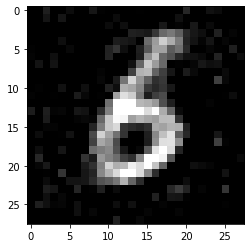

Epoch [130/200], Step[300/600], d_loss: 0.6167, g_loss: 1.9700, D(x): 0.84, D(G(z)): 0.27
Epoch [130/200], Step[600/600], d_loss: 0.6610, g_loss: 2.2646, D(x): 0.83, D(G(z)): 0.26


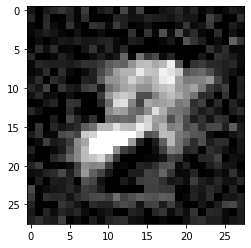

Epoch [131/200], Step[300/600], d_loss: 0.8685, g_loss: 2.8562, D(x): 0.73, D(G(z)): 0.26
Epoch [131/200], Step[600/600], d_loss: 0.8345, g_loss: 1.9367, D(x): 0.73, D(G(z)): 0.28


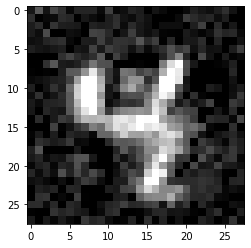

Epoch [132/200], Step[300/600], d_loss: 0.8231, g_loss: 1.9556, D(x): 0.71, D(G(z)): 0.23
Epoch [132/200], Step[600/600], d_loss: 1.1239, g_loss: 2.1411, D(x): 0.66, D(G(z)): 0.27


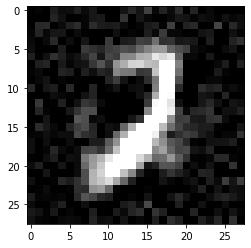

Epoch [133/200], Step[300/600], d_loss: 0.9027, g_loss: 2.8333, D(x): 0.75, D(G(z)): 0.29
Epoch [133/200], Step[600/600], d_loss: 0.5904, g_loss: 2.5505, D(x): 0.82, D(G(z)): 0.24


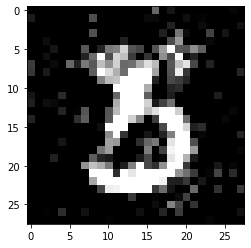

Epoch [134/200], Step[300/600], d_loss: 1.3017, g_loss: 2.0078, D(x): 0.70, D(G(z)): 0.38
Epoch [134/200], Step[600/600], d_loss: 0.7388, g_loss: 2.0736, D(x): 0.75, D(G(z)): 0.25


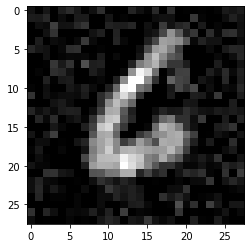

Epoch [135/200], Step[300/600], d_loss: 0.5228, g_loss: 2.7546, D(x): 0.87, D(G(z)): 0.23
Epoch [135/200], Step[600/600], d_loss: 0.7660, g_loss: 2.0396, D(x): 0.76, D(G(z)): 0.25


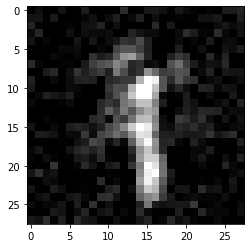

Epoch [136/200], Step[300/600], d_loss: 0.5856, g_loss: 2.4282, D(x): 0.87, D(G(z)): 0.26
Epoch [136/200], Step[600/600], d_loss: 1.0571, g_loss: 1.8063, D(x): 0.74, D(G(z)): 0.36


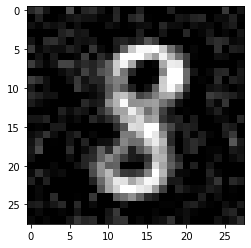

Epoch [137/200], Step[300/600], d_loss: 0.7236, g_loss: 2.3248, D(x): 0.75, D(G(z)): 0.24
Epoch [137/200], Step[600/600], d_loss: 0.8911, g_loss: 2.5688, D(x): 0.71, D(G(z)): 0.25


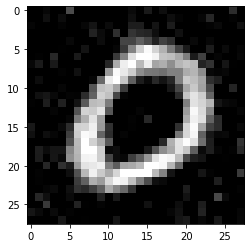

Epoch [138/200], Step[300/600], d_loss: 0.6498, g_loss: 2.5895, D(x): 0.78, D(G(z)): 0.20
Epoch [138/200], Step[600/600], d_loss: 0.7464, g_loss: 2.0172, D(x): 0.72, D(G(z)): 0.20


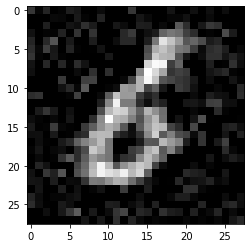

Epoch [139/200], Step[300/600], d_loss: 0.8256, g_loss: 3.1665, D(x): 0.72, D(G(z)): 0.23
Epoch [139/200], Step[600/600], d_loss: 0.6852, g_loss: 1.9828, D(x): 0.76, D(G(z)): 0.21


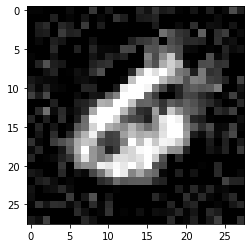

Epoch [140/200], Step[300/600], d_loss: 1.0811, g_loss: 1.8406, D(x): 0.68, D(G(z)): 0.32
Epoch [140/200], Step[600/600], d_loss: 0.6207, g_loss: 2.7284, D(x): 0.78, D(G(z)): 0.20


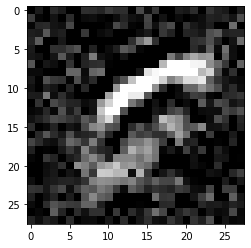

Epoch [141/200], Step[300/600], d_loss: 0.5653, g_loss: 3.1221, D(x): 0.85, D(G(z)): 0.28
Epoch [141/200], Step[600/600], d_loss: 1.0160, g_loss: 2.0589, D(x): 0.64, D(G(z)): 0.23


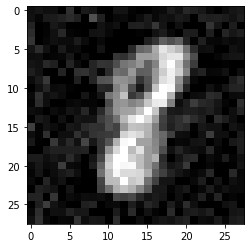

Epoch [142/200], Step[300/600], d_loss: 0.9218, g_loss: 1.8893, D(x): 0.76, D(G(z)): 0.30
Epoch [142/200], Step[600/600], d_loss: 0.6311, g_loss: 2.6921, D(x): 0.74, D(G(z)): 0.17


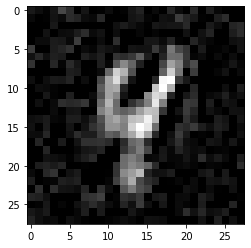

Epoch [143/200], Step[300/600], d_loss: 0.6710, g_loss: 2.8285, D(x): 0.80, D(G(z)): 0.23
Epoch [143/200], Step[600/600], d_loss: 0.7656, g_loss: 2.0283, D(x): 0.84, D(G(z)): 0.33


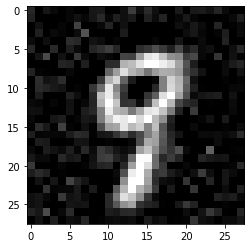

Epoch [144/200], Step[300/600], d_loss: 0.5950, g_loss: 2.6173, D(x): 0.81, D(G(z)): 0.20
Epoch [144/200], Step[600/600], d_loss: 0.6141, g_loss: 2.9641, D(x): 0.84, D(G(z)): 0.20


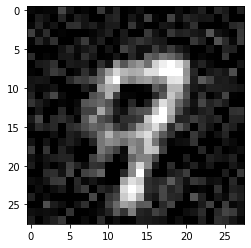

Epoch [145/200], Step[300/600], d_loss: 0.9585, g_loss: 3.1740, D(x): 0.74, D(G(z)): 0.27
Epoch [145/200], Step[600/600], d_loss: 1.1197, g_loss: 1.9228, D(x): 0.68, D(G(z)): 0.33


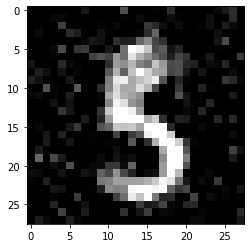

Epoch [146/200], Step[300/600], d_loss: 0.9175, g_loss: 2.8119, D(x): 0.68, D(G(z)): 0.23
Epoch [146/200], Step[600/600], d_loss: 1.4444, g_loss: 32.1369, D(x): 0.54, D(G(z)): 0.31


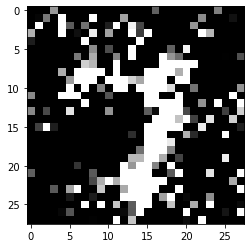

Epoch [147/200], Step[300/600], d_loss: 0.6838, g_loss: 2.3140, D(x): 0.81, D(G(z)): 0.24
Epoch [147/200], Step[600/600], d_loss: 0.5084, g_loss: 2.1230, D(x): 0.82, D(G(z)): 0.15


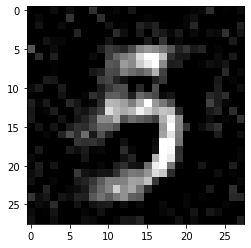

Epoch [148/200], Step[300/600], d_loss: 0.8473, g_loss: 2.0993, D(x): 0.68, D(G(z)): 0.20
Epoch [148/200], Step[600/600], d_loss: 0.5631, g_loss: 2.5482, D(x): 0.86, D(G(z)): 0.25


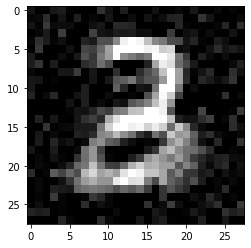

KeyboardInterrupt: ignored

In [14]:
for epoch in range(200):
    accuracy_real = 0
    accuracy_fake = 0

    for i, (images, _) in enumerate(data_loader):
        # Build mini-batch dataset
        batch_size = images.size(0)
        images = to_cuda(images.view(batch_size, -1))
        
        # Create the labels which are later used as input for the BCE loss
        real_labels = to_cuda(torch.ones(batch_size))
        fake_labels = to_cuda(torch.zeros(batch_size))
        
        #============= Train the discriminator =============#
        # Compute BCE_Loss using real images where BCE_Loss(x, y):
        #         - y * log(D(x)) - (1-y) * log(1 - D(x))
        # Second term of the loss is always zero since real_labels == 1
        D.train()
        G.train(False) # <-> G.eval()

        outputs = D(images) # Real images
        d_loss_real = criterion(outputs.squeeze(1), real_labels)
        real_score = outputs
        
        # Compute BCELoss using fake images
        # First term of the loss is always zero since fake_labels == 0
        z = to_cuda(torch.randn(batch_size, 64))
        fake_images = G(z) # Generate fake images
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs.squeeze(1), fake_labels)
        fake_score = outputs
        
        # Backprop + Optimize
        d_loss = d_loss_real + d_loss_fake
        D.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        #=============== Train the generator ===============#
        # Compute loss with fake images
        D.train(False)
        G.train()
        z = to_cuda(torch.randn(batch_size, 64))
        fake_images = G(z)
        outputs = D(fake_images)
        
        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))        
        g_loss = criterion(outputs.squeeze(1), real_labels)
        
        # Backprop + Optimize
        D.zero_grad()
        G.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
        if (i+1) % 300 == 0:
            print('Epoch [%d/%d], Step[%d/%d], d_loss: %.4f, '
                  'g_loss: %.4f, D(x): %.2f, D(G(z)): %.2f' 
                  %(epoch, 200, i+1, 600, d_loss.data, g_loss.data,
                    real_score.data.mean(), fake_score.data.mean()))
    
    # Save real images
    if (epoch+1) == 1:
        images = images.view(images.size(0), 1, 28, 28)
        save_image(denorm(images.data), './data/real_images.png')

    plt.imshow(denorm(fake_images.data[0]).view(28, 28).cpu().numpy(), cmap='gray')
    plt.show()
    
    # Save sampled images
    fake_images = fake_images.view(fake_images.size(0), 1, 28, 28)
    save_image(denorm(fake_images.data), './data/fake_images-%d.png' %(epoch+1))